In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math
import random
import pickle
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV
from scipy import stats,spatial

In [2]:
data = pd.read_csv('C:\\Users\\dtulomba\\Documents\\ProjetsCours\\projet4\\2016_Building_Energy_Benchmarking.csv', sep=',')

In [3]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [4]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [5]:
data.shape

(3376, 46)

In [6]:
data.isna().sum().sum()

19952

### Exploration initiale des données

In [7]:
def shape(dataframe):
    """Calcuates and displays the shape of the dataframe and the filling rage"""
    
    # get the numbers of rows and columns in the dataframe
    nb_rows, nb_columns = dataframe.shape
    print("\nDataFrame has {} rows and {} columns.".format(nb_rows,nb_columns))

    # get the number of non-Nan data in the dataframe
    nb_data = dataframe.describe(include='all').loc["count"].sum()

    # computing the filling rate by rounding down to 2 decimal places
    import math
    filling_rate = math.floor(nb_data*10000 / (nb_rows * nb_columns))/10000
    print("The global filling rate of the DataFrame is : {:.2%}".format(filling_rate))
    
    # computing the missing values
    nb_missing = int((nb_rows * nb_columns) - nb_data)
    print("There are {} missing values out of {}.".format(nb_missing, int(nb_rows * nb_columns)))

In [8]:
shape(data)


DataFrame has 3376 rows and 46 columns.
The global filling rate of the DataFrame is : 87.15%
There are 19952 missing values out of 155296.


In [9]:
data.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1156514.25,3946027.0,12764.5293,1276453.0,False,NaN,Compliant,NaN,249.98,2.83


### Suppression des données où la cible est manquante

In [10]:
def missing_target(dataframe, target):
    """This function takes a dataframe and target feature, and returns
    a view of the dataframe containing the rows where the target value is missing.
    It also remove these rows from the original dataframe."""
    
    # Mask for rows where the target value is missing
    mask = dataframe[target].isnull()
    
    # Applying the mask to the dataframe and saving it as a copy
    result = dataframe[mask].copy()
    
    # Deleting the rows with missing target from the dataframe
    dataframe.dropna(subset=[target], inplace=True)
    
    # Returning a dataframe with rows where target is missing
    return result

In [11]:
target_cols = ['SiteEnergyUseWN(kBtu)','TotalGHGEmissions']
dataframe = data

# Initializing
production_set = pd.DataFrame()

# concatenating rows with missing values on any target
for target in target_cols:
    production_set = pd.concat([
        production_set,
        missing_target(dataframe, target)
    ])

# dropping duplicates rows (missing several targets)
production_set = production_set.drop_duplicates(keep='first').copy()

# Display the 'production set' on which to apply the ML model
production_set

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
563,757,2016,NonResidential,Large Office,Market Place I & II-2003 Western Avenue,2003 Western Avenue,Seattle,WA,98121.0,1977200280,...,1427645.25,4871126.0,14160.40918,1416041.0,False,NaN,Compliant,NaN,109.16,0.83
578,773,2016,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING,215 COLUMBIA ST,Seattle,WA,98104.0,0939000245,...,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN
758,19798,2016,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,7239 SAND POINT WAY NE,Seattle,WA,98115.0,0225049032,...,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN
1792,23437,2016,Multifamily LR (1-4),Low-Rise Multifamily,MERCER CREST APT,500 W MERCER ST,Seattle,WA,98119.0,3876900230,...,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN
2474,25752,2016,Multifamily LR (1-4),Low-Rise Multifamily,GRANVIEW APARTMENTS,1120 N 93RD ST,Seattle,WA,98103.0,9267200155,...,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN
2670,26532,2016,NonResidential,Mixed Use Property,KALBERG BUILDING,4515 UNIVERSITY WAY NE,Seattle,WA,98105.0,8816401120,...,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN
1768,23355,2016,Multifamily LR (1-4),Low-Rise Multifamily,GRAHAM VIEW,6040 CALIFORNIA AVE SW,Seattle,WA,98136.0,7625703280,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN
2321,25431,2016,Multifamily LR (1-4),Low-Rise Multifamily,PONDERAY APTS,5625 15TH AVE NE,Seattle,WA,98105.0,5226300030,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN
2480,25763,2016,Multifamily LR (1-4),Low-Rise Multifamily,Villa Andora,1520 CALIFORNIA AVE SW,Seattle,WA,98116.0,9272201340,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN
3348,50082,2016,Multifamily LR (1-4),Low-Rise Multifamily,STREAM FIFTEEN,605 15TH AVE E,Seattle,WA,98112.0,3303700030,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN


### Sauvegarde des données "brutes"

In [12]:
# Save the file
data.to_csv("p4_data_raw.csv")

In [13]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

####  Nettoyage
Suppression des données non-explicatives

In [14]:
features_to_drop = [         
    'DataYear',
    'PropertyName',
    'TaxParcelIdentificationNumber',
    'Comments',
    'ZipCode',
    'State',
    'Address',
    'City'
]

# Drop several columns
for feature in features_to_drop:
    data = data.drop(feature, axis=1)

## Suppression de données non destinés à l'habitation 

In [15]:
data["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [16]:
list_types_house = ['NonResidential', 'Nonresidential COS',
       'SPS-District K-12', 'Campus', 'Nonresidential WA']

In [17]:
data = data.loc[data["BuildingType"].isin(list_types_house)]

In [18]:
data["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [19]:
data.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

### Suppression des données issues des relevés de consommation annuels

Nous supprimons aussi les variables (colonnes) issues des relevés de consommation annuels (hormis ceux qui seront utilisés comme étiquette pour la régression) et celles que nous convertirons en variables booléennes.


In [20]:
features_to_drop2 = [         
        'SiteEUI(kBtu/sf)',
        'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)',
        'SourceEUIWN(kBtu/sf)',
        'SiteEnergyUseWN(kBtu)',
        'GHGEmissionsIntensity'
]

# Drop several columns
for feature in features_to_drop2:
    data = data.drop(feature, axis=1)

In [21]:
# Delete the identifier of buildings
data = data.drop('OSEBuildingID', axis=1)

In [22]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions'],
      dtype='object')

In [23]:
data

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions
0,NonResidential,Hotel,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,7.226362e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98
1,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,8.387933e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86
2,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,7.258702e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28
3,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,6.794584e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43
4,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,1.417261e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,...,8.497457e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,NaN,20.94
3372,Nonresidential COS,Other,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,...,9.502762e+05,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,NaN,32.17
3373,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,...,5.765898e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,NaN,223.54
3374,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,...,7.194712e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,NaN,22.11


### Étude du taux de remplissage des variables

In [24]:
nb_rows, nb_columns = data.shape

# Count of the values on each column
columns_count = data.count()

# Sort the Series
columns_count = columns_count.sort_values(ascending=False)

# Calculating filling rates
filling_rates = columns_count / nb_rows

# Display the filling rates
filling_rates

BuildingType                       1.000000
ListOfAllPropertyUseTypes          1.000000
ComplianceStatus                   1.000000
DefaultData                        1.000000
NaturalGas(kBtu)                   1.000000
NaturalGas(therms)                 1.000000
Electricity(kBtu)                  1.000000
Electricity(kWh)                   1.000000
SteamUse(kBtu)                     1.000000
SiteEnergyUse(kBtu)                1.000000
PrimaryPropertyType                1.000000
TotalGHGEmissions                  1.000000
PropertyGFABuilding(s)             1.000000
NumberofFloors                     1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
Latitude                           1.000000
Longitude                          1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
PropertyGFATotal                   1.000000
PropertyGFAParking                 1.000000
LargestPropertyUseType          

#### Élimination des colonnes trop peu remplies

Nous décidons de ne conserver que les colonnes remplies à 65% minimum pour la modélisation.

Cela nous permet de conserver la variable ENERGYSTARScore dont nous devrons étudier la pertinence (dans la partie modélisation).


In [25]:
def fillingrate_filter_columns(dataframe, limit_rate):
    """This function drop the colums where the filling rate is less than a defined limit rate."""

    # Count of the values on each column
    columns_count = dataframe.count()

    # Number of rows in the dataframe
    nb_rows = dataframe.shape[0]
    
    # Calculating filling rates
    filling_rates = columns_count / nb_rows

    # Define a mask of features with a filling_rate bigger than the limit rate
    mask = filling_rates > limit_rate
    
    # Apply the mask to the filling_rates Series
    filling_rates_selection = filling_rates[mask]
    
    # Get the list of the name of the selected columns
    features_selection = list(filling_rates_selection.index)
    print("Number of columns with a filling rate bigger than  {:.2%} : {} columns.".format(limit_rate, len(features_selection)))

    # Return a projection on the selection of features
    return dataframe[features_selection]

In [26]:
data = fillingrate_filter_columns(data, 0.65)
shape(data)

Number of columns with a filling rate bigger than  65.00% : 25 columns.

DataFrame has 1665 rows and 25 columns.
The global filling rate of the DataFrame is : 98.60%
There are 580 missing values out of 41625.


In [27]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
       'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData',
       'ComplianceStatus', 'TotalGHGEmissions'],
      dtype='object')

#### Étude du remplissage des lignes

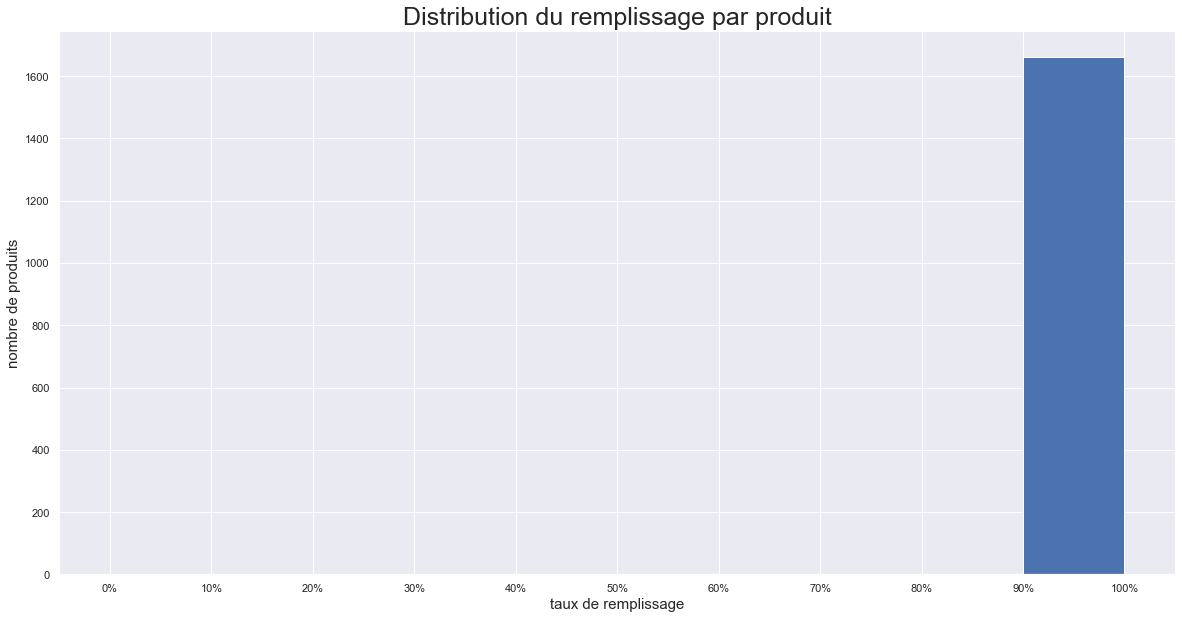

In [28]:

# Count the non-null values on each row
row_count = data.count(axis=1)

# Calculating filling rates
nb_columns = data.shape[1]
filling_rates_row = row_count / nb_columns

# Plotting histogram
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Distribution du remplissage par produit", fontsize=25)
plt.xlabel("taux de remplissage", fontsize=15)
plt.ylabel("nombre de produits", fontsize=15)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
bins = np.linspace(0, 1, num=11)
ax.hist(filling_rates_row, bins=bins)
ax.xaxis.set_major_locator(plt.MaxNLocator(11))
plt.show()

In [29]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
       'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData',
       'ComplianceStatus', 'TotalGHGEmissions'],
      dtype='object')

Nous constatons que la majeur partie des lignes est remplie à plus de 90%. Nous allons faire de l'imputation pour les dernières valeurs manquantes.

#### Études univariées des variables cibles

Nous allons étudier la distribution des variables 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions' et tester leur normalité.

#### Indicateurs statistiques principaux

In [30]:
# .describe() pour min-max…
data[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].describe()

,SiteEnergyUse(kBtu),TotalGHGEmissions
count,1.665000e+03,1665.000000
mean,8.439892e+06,185.018835
std,3.025278e+07,752.199624
min,0.000000e+00,-0.800000
25%,1.228114e+06,19.930000
50%,2.553764e+06,49.580000
75%,6.917280e+06,142.390000
max,8.739237e+08,16870.980000


### Distributions empiriques initiales

In [31]:
def empirical_distribution(dataframe, feature):
    """Function plotting the bar plot and a boxplot (as subplots) for a distribution."""
    
    # Loading libraries
    import matplotlib.pyplot as plt
    import seaborn as sns

    # filtering non-null data
    mask = dataframe[feature].notnull()
    data_view = dataframe[mask]
    
    # Setting the data to plot
    x = data_view[feature]
    
    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize=(20, 10))
    plt.suptitle("Statistical distribution: " + feature, fontsize=25)
    ax1 = fig.add_subplot(211) # histogram
    ax2 = fig.add_subplot(212) # boxplot

    # Tell distplot to plot on ax1 with the ax argument
    sns.distplot(x, ax=ax1)
    ax1.set_ylabel("Frequency", fontsize=20)
    ax1.set_xlabel("")

    # Tell the boxplot to plot on ax2 with the ax argument
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
    sns.boxplot(x,
                ax=ax2,
                showfliers=True,
                medianprops=medianprops,
                showmeans=True,
                meanprops=meanprops)
    ax2.set_xlabel("Value", fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


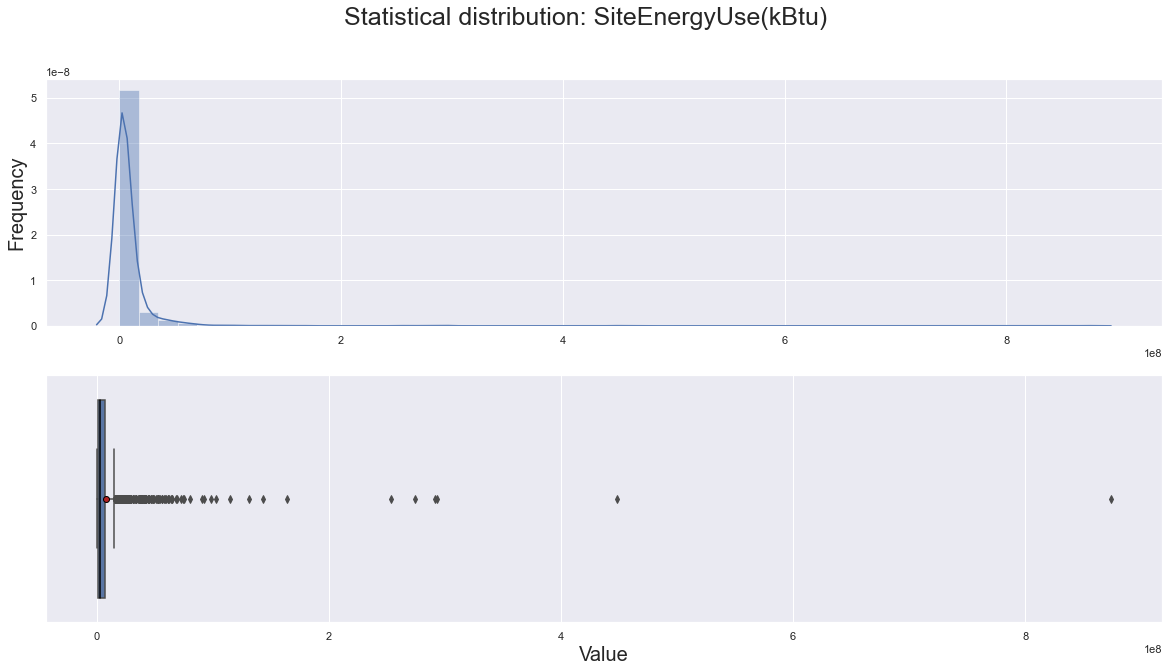

In [32]:
# Setting parameters before calling the function
dataframe = data
feature = 'SiteEnergyUse(kBtu)'

# Call to the function
empirical_distribution(dataframe, feature)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


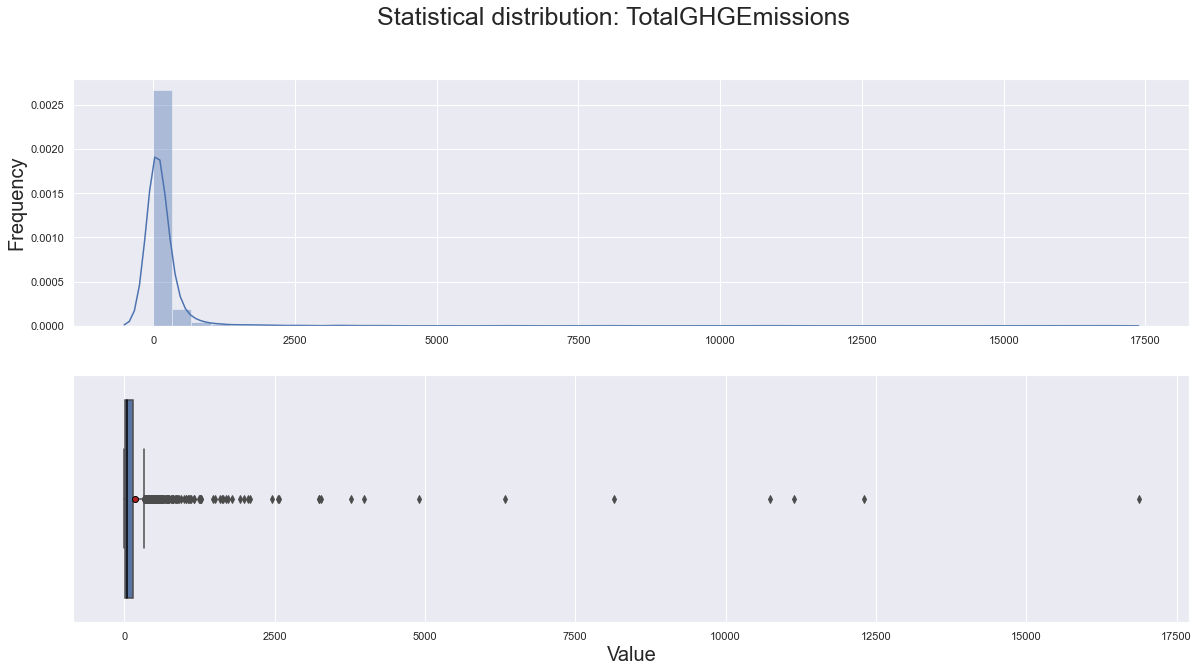

In [33]:
# Setting parameters before calling the function
dataframe = data
feature = 'TotalGHGEmissions'

# Call to the function
empirical_distribution(dataframe, feature)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


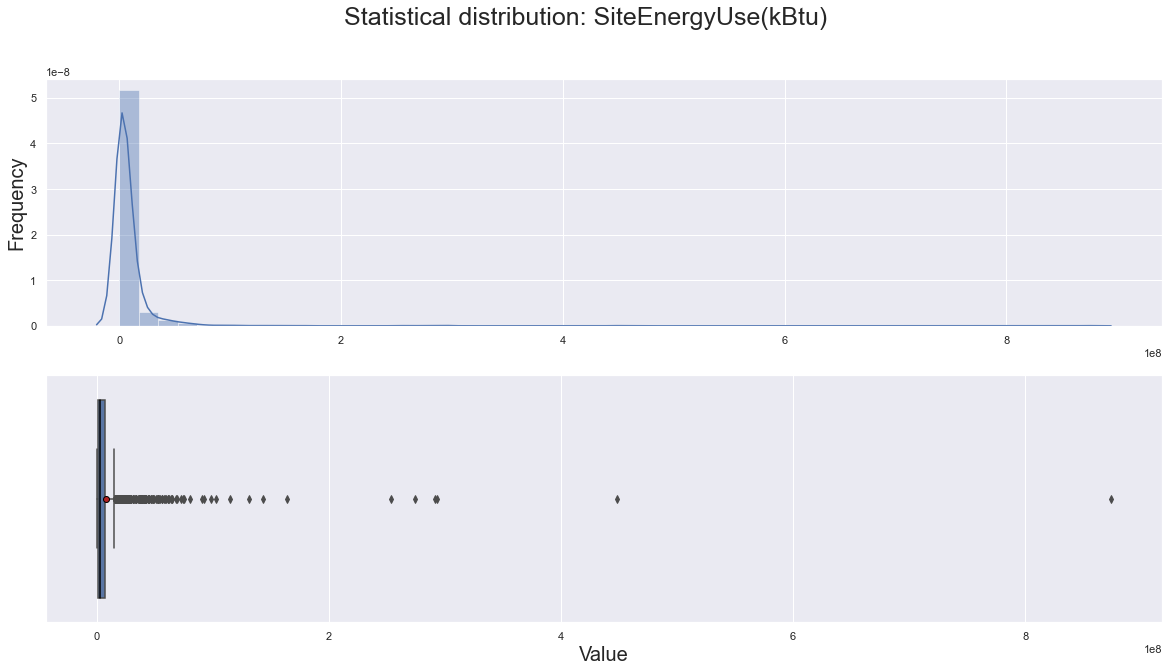

In [34]:


# Setting parameters before calling the function
dataframe = data
feature = 'SiteEnergyUse(kBtu)'

# Call to the function
empirical_distribution(dataframe, feature)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


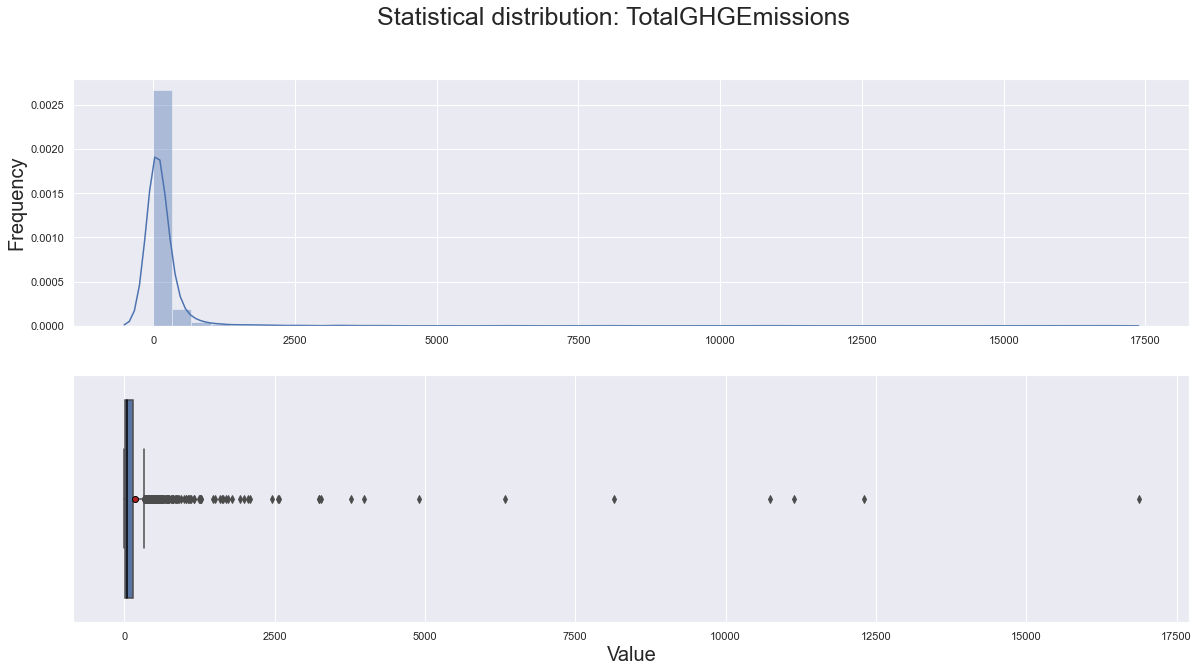

In [35]:
# Setting parameters before calling the function
dataframe = data
feature = 'TotalGHGEmissions'

# Call to the function
empirical_distribution(dataframe, feature)

Tests de normalité (Shapiro-Wilk)

Il semble que les variables cibles ('TotalGHGEmissions', 'SiteEnergyUse(kBtu)') ne soient pas normalement distribuées. Nous allons le vérifier avec un test statistique :

H0 : les valeurs de la variable aléatoire pour l'échantillon sont issus d'une population normalement distribuée.

H1 :  les valeurs de la variable aléatoire pour l'échantillon NE sont PAS issus d'une population normalement distribuée

In [36]:
def shapiro_wilk(dataframe, feature):
    '''This function proceed to the Shapiro-Wilk test (for gaussian distribution).
    It takes a dataframe and the name of the feature to test.
    It filters for non-null vallues of the feature and print the results.'''
    
    # Loading libraries
    from scipy.stats import shapiro

    # filtering non-null data for the feature
    mask = dataframe[feature].notnull()
    data_view = dataframe[mask][feature]

    # processing the Shopiro-Wilk test on the filtered data
    results = shapiro(data_view)

    # Print results
    print("Shapiro-Wilk test's statistic value is: W = {}".format(results[0]))
    print("Shapiro-Wilk test's p-value is: p = {}".format(results[1]))
    print("\nGaussian distribution hypothesis for \'{}\' can be rejected at a risk of {:.2f}%.".format(feature, results[1]*100))

In [37]:
dataframe = data
feature = 'SiteEnergyUse(kBtu)'
shapiro_wilk(dataframe, feature)

Shapiro-Wilk test's statistic value is: W = 0.19371795654296875
Shapiro-Wilk test's p-value is: p = 0.0

Gaussian distribution hypothesis for 'SiteEnergyUse(kBtu)' can be rejected at a risk of 0.00%.


In [38]:
dataframe = data
feature = 'TotalGHGEmissions'
shapiro_wilk(dataframe, feature)

Shapiro-Wilk test's statistic value is: W = 0.17707973718643188
Shapiro-Wilk test's p-value is: p = 0.0

Gaussian distribution hypothesis for 'TotalGHGEmissions' can be rejected at a risk of 0.00%.


### Ingéniérie des caractéristiques (features engineering)

In [39]:
data.head()

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions
0,NonResidential,Hotel,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,60.0,7226362.5,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98
1,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,61.0,8387933.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86
2,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,43.0,72587024.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28
3,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,56.0,6794584.0,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43
4,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,75.0,14172606.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01


In [40]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
       'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData',
       'ComplianceStatus', 'TotalGHGEmissions'],
      dtype='object')

In [41]:
data.dtypes

BuildingType                  object
PrimaryPropertyType           object
CouncilDistrictCode            int64
Neighborhood                  object
Latitude                     float64
Longitude                    float64
YearBuilt                      int64
NumberofBuildings            float64
NumberofFloors                 int64
PropertyGFATotal               int64
PropertyGFAParking             int64
PropertyGFABuilding(s)         int64
ListOfAllPropertyUseTypes     object
LargestPropertyUseType        object
LargestPropertyUseTypeGFA    float64
ENERGYSTARScore              float64
SiteEnergyUse(kBtu)          float64
SteamUse(kBtu)               float64
Electricity(kWh)             float64
Electricity(kBtu)            float64
NaturalGas(therms)           float64
NaturalGas(kBtu)             float64
DefaultData                     bool
ComplianceStatus              object
TotalGHGEmissions            float64
dtype: object

### Inspection de la variable 'ComplianceStatus'

In [42]:
data['ComplianceStatus'].value_counts()

Compliant                       1547
Error - Correct Default Data      88
Non-Compliant                     16
Missing Data                      14
Name: ComplianceStatus, dtype: int64

### Ajout d'une variable ancienneté du bâtiment

In [43]:
# Getting current year
import datetime
current_year = datetime.datetime.now().year

# Computing the age of the building and saving it in the DataFrame
data['BuildingAge'] = current_year - data['YearBuilt']

# Deleting the 'YearBuilt' column (colinear to 'BuildingAge')
data = data.drop(columns=['YearBuilt'])

C:\Users\dtulomba\AppData\Local\Temp/ipykernel_20612/1466706206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BuildingAge'] = current_year - data['YearBuilt']


In [44]:
from math import radians, cos, sin, asin, sqrt

In [45]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [46]:
latitude_center = 47.621214
longitude_center = -122.349809

In [47]:
data['distance_center'] = data.apply(lambda x:haversine(latitude_center, longitude_center, x["Latitude"], x["Longitude"]), axis=1)

In [48]:
data

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,BuildingAge,distance_center
0,NonResidential,Hotel,7,DOWNTOWN,47.61220,-122.33799,1.0,12,88434,0,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,96,1.419403
1,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1.0,11,103566,15064,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,27,1.829354
2,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.33810,1.0,41,956110,196718,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,54,1.372196
3,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1.0,10,61320,0,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,97,1.523923
4,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1.0,18,175580,62000,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,43,1.129403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,2,GREATER DUWAMISH,47.56722,-122.31154,1.0,1,12294,0,...,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,20.94,33,5.330813
3372,Nonresidential COS,Other,2,DOWNTOWN,47.59625,-122.32283,1.0,1,16000,0,...,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,19,3.347258
3373,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,1,13157,0,...,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,223.54,49,1.272145
3374,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,47.52832,-122.32431,1.0,1,14101,0,...,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,22.11,34,6.210200


In [49]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions', 'BuildingAge', 'distance_center'],
      dtype='object')

In [50]:
data["nb_use_types"] = data["ListOfAllPropertyUseTypes"].apply(lambda x:len(x.split(",")))

In [51]:
data

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,BuildingAge,distance_center,nb_use_types
0,NonResidential,Hotel,7,DOWNTOWN,47.61220,-122.33799,1.0,12,88434,0,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,96,1.419403,1
1,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1.0,11,103566,15064,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,27,1.829354,3
2,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.33810,1.0,41,956110,196718,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,54,1.372196,1
3,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1.0,10,61320,0,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,97,1.523923,1
4,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1.0,18,175580,62000,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,43,1.129403,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,2,GREATER DUWAMISH,47.56722,-122.31154,1.0,1,12294,0,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,20.94,33,5.330813,1
3372,Nonresidential COS,Other,2,DOWNTOWN,47.59625,-122.32283,1.0,1,16000,0,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,19,3.347258,1
3373,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,1,13157,0,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,223.54,49,1.272145,3
3374,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,47.52832,-122.32431,1.0,1,14101,0,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,22.11,34,6.210200,5


In [52]:
data2 = data.copy()

In [53]:
data2.columns 

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions', 'BuildingAge', 'distance_center', 'nb_use_types'],
      dtype='object')

### Conversion des types d'énergies consommées en variables booléennes

In [54]:
# Electricity use
data2['Electricity'] = data2['Electricity(kWh)'].astype(bool)
data2 = data2.drop(columns=['Electricity(kWh)'])

# Steam use
data2['SteamUse'] = data2['SteamUse(kBtu)'].astype(bool)
data2 = data2.drop(columns=['SteamUse(kBtu)'])

# NaturalGas use
data2['NaturalGas'] = data2['NaturalGas(therms)'].astype(bool)
data2 = data2.drop(columns=['NaturalGas(therms)'])


In [55]:
data2 = data2.drop(columns=['Electricity(kBtu)', 'NaturalGas(kBtu)'])


In [56]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions', 'BuildingAge', 'distance_center', 'nb_use_types'],
      dtype='object')

In [57]:
data2.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'DefaultData',
       'ComplianceStatus', 'TotalGHGEmissions', 'BuildingAge',
       'distance_center', 'nb_use_types', 'Electricity', 'SteamUse',
       'NaturalGas'],
      dtype='object')

### Conversion de la colonne 'CouncilDistrictCode' en variable catégorielle

In [58]:
data_plot = data2.copy()

In [59]:
# Converting dtype of the column
data_plot['CouncilDistrictCode'] = data_plot['CouncilDistrictCode'].astype('category')
data_plot['CouncilDistrictCode'].dtype


CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7], ordered=False)

In [60]:
data_plot["SiteEnergyUse(kBtu)"]

0       7.226362e+06
1       8.387933e+06
2       7.258702e+07
3       6.794584e+06
4       1.417261e+07
            ...     
3371    8.497457e+05
3372    9.502762e+05
3373    5.765898e+06
3374    7.194712e+05
3375    1.152896e+06
Name: SiteEnergyUse(kBtu), Length: 1665, dtype: float64

In [61]:
data_plot['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

data_plot.columns

In [62]:
data_plot['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [63]:
list_of_variables = ["PrimaryPropertyType", "Neighborhood"]

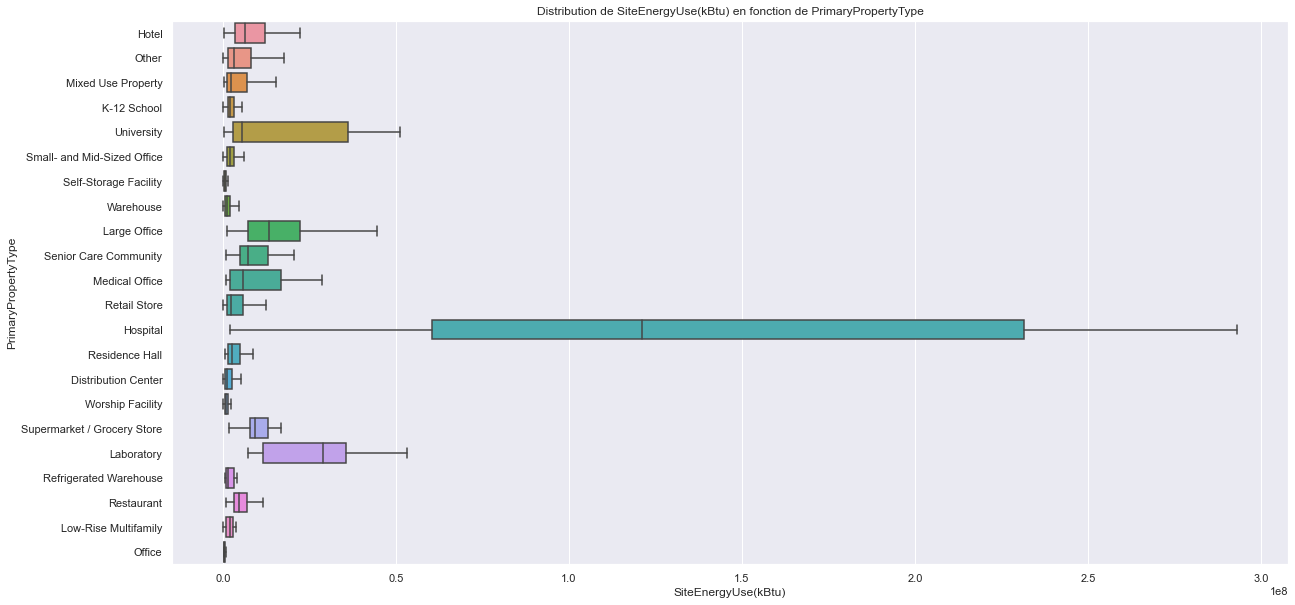

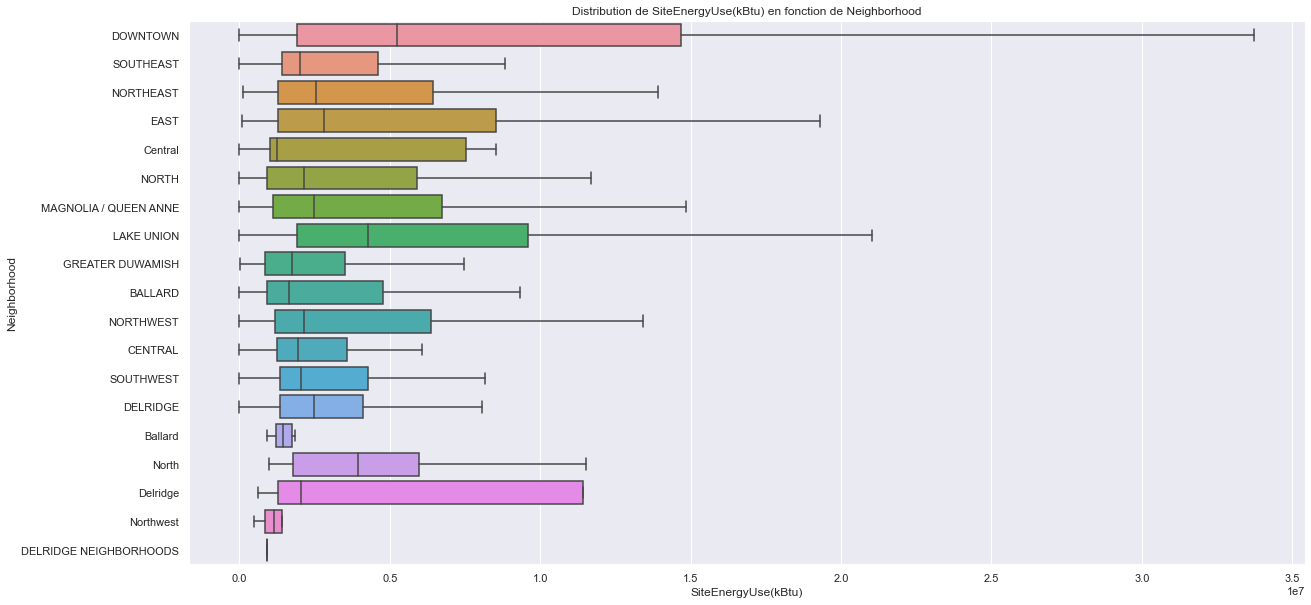

In [64]:
for var_name in list_of_variables:
    
    plt.subplots(figsize=(20,10))
    ax = sns.boxplot(x="SiteEnergyUse(kBtu)", y=var_name, data=data_plot, showfliers=False).set(title="Distribution de SiteEnergyUse(kBtu) en fonction de " + var_name )
    plt.show()

In [65]:
data2["PrimaryPropertyType"].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

### Regroupement des variables en fonction des catégories 

In [66]:
def create_level_consump(variable):
    X = []
    for i in variable :
        if i == "hospital" or i == "Laboratory" or i == "University": 
            x = "buildings with high electricity consumption"
        elif i == "Hotel" or i == "Large Office" or i == "Medical Office":
            x = "medium electricity consuming buildings"
        elif i == "Other" or i == "Senior Care Community" or i == "Retail Store" or i == "Supermarket/Grocery Store" or i == "High-Rise Multifamily":
            x = "low electricity consumption buildings"
        else: 
            x = "very low electricity consumption buildings"
        X.append(x)
    print(len(X))
    return X

data2["Buildings Consumption"] = create_level_consump(data2["PrimaryPropertyType"])
print("--------------")
print(data2["Buildings Consumption"])
print("-----------------")
print(data2.columns)
print(data2.shape)

1665
--------------
0           medium electricity consuming buildings
1           medium electricity consuming buildings
2           medium electricity consuming buildings
3           medium electricity consuming buildings
4           medium electricity consuming buildings
                           ...                    
3371    very low electricity consumption buildings
3372         low electricity consumption buildings
3373         low electricity consumption buildings
3374    very low electricity consumption buildings
3375    very low electricity consumption buildings
Name: Buildings Consumption, Length: 1665, dtype: object
-----------------
Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYS

In [67]:
def create_level_consump_place(variable):
    X = []
    for i in variable :
        if i == "DOWNTOWN" or i == "Delridge" or i == "LAKE UNION": 
            x = "Neighborhood with high electricity consumption"
        elif i == "NORTHEAST" or i == "NORTH" or i == "BALLARD" or i == "NORTHWEST" or i == "CENTRAL" or i == "DELRIDGE":
            x = "Neighborhood with medium electricity consumption"
        else: 
            x = "Neighborhood with avery low electricity consumption"
        X.append(x)
    print(len(X))
    return X


data2["Neighborhood Consumption"] = create_level_consump_place(data2["Neighborhood"])
print("--------------")
print(data2["Neighborhood Consumption"])
print("-----------------")
print(data2.columns)
print(data2.shape)

1665
--------------
0          Neighborhood with high electricity consumption
1          Neighborhood with high electricity consumption
2          Neighborhood with high electricity consumption
3          Neighborhood with high electricity consumption
4          Neighborhood with high electricity consumption
                              ...                        
3371    Neighborhood with avery low electricity consum...
3372       Neighborhood with high electricity consumption
3373    Neighborhood with avery low electricity consum...
3374    Neighborhood with avery low electricity consum...
3375    Neighborhood with avery low electricity consum...
Name: Neighborhood Consumption, Length: 1665, dtype: object
-----------------
Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes

In [68]:
data2.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'DefaultData',
       'ComplianceStatus', 'TotalGHGEmissions', 'BuildingAge',
       'distance_center', 'nb_use_types', 'Electricity', 'SteamUse',
       'NaturalGas', 'Buildings Consumption', 'Neighborhood Consumption'],
      dtype='object')

#### faire les graphs ici ... 

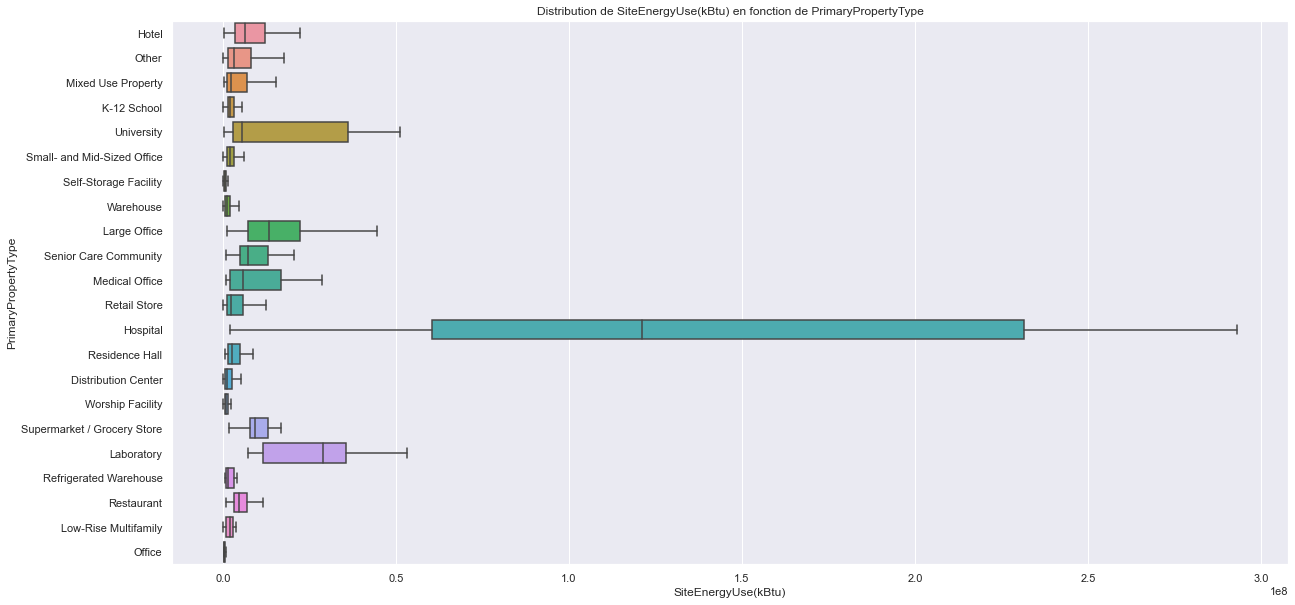

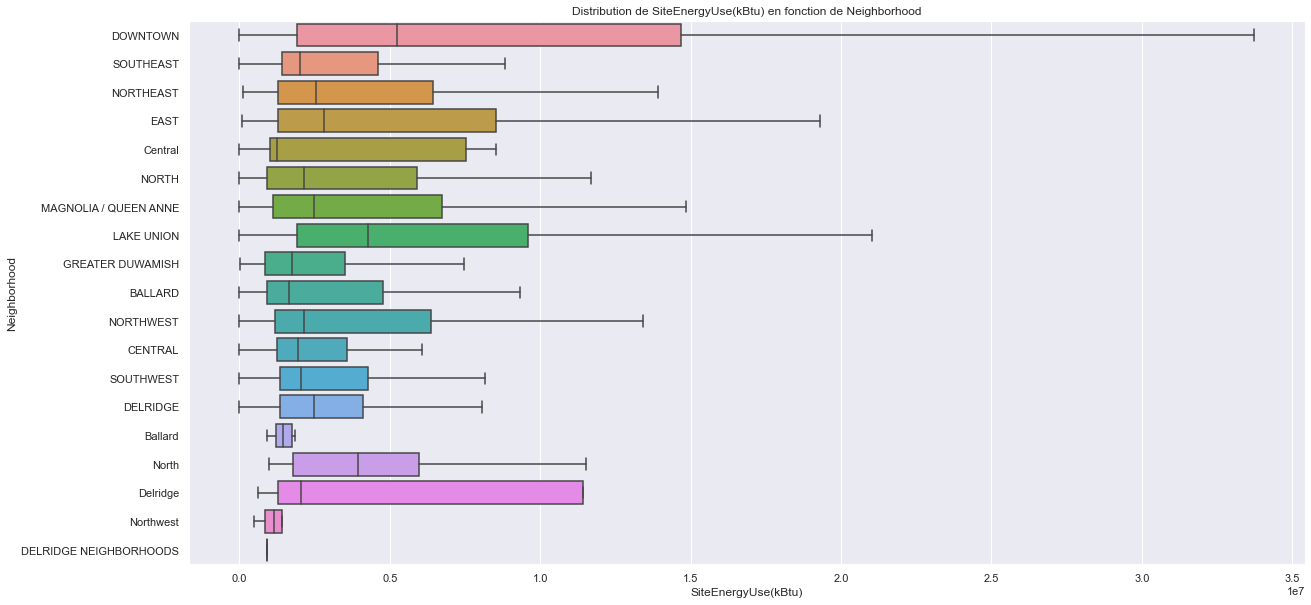

In [69]:
for var_name in list_of_variables:
    
    plt.subplots(figsize=(20,10))
    ax = sns.boxplot(x="SiteEnergyUse(kBtu)", y=var_name, data=data2, showfliers=False).set(title="Distribution de SiteEnergyUse(kBtu) en fonction de " + var_name )
    plt.show()

### Conversion de la colonne 'DefaultData' en variable booléenne

### Étude des corrélations entre variables

La librairie dython (http://shakedzy.xyz/dython/) permet de calculer :

    pour les couples de variables quantitatives :
        le coefficient de correlation de Pearson R

    pour les couples de variables catégorielles :
        le coefficient de Cramer V (symetrique)
        le coefficient d'incertitude de Theil U (asymetrique)

    pour les couples de variables mixtes (quantitative + catégorielle) :
        le ratio de correlation η (eta)



C:\Users\dtulomba\AppData\Local\Temp/ipykernel_20612/3405191826.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data2.corr(), dtype=np.bool))


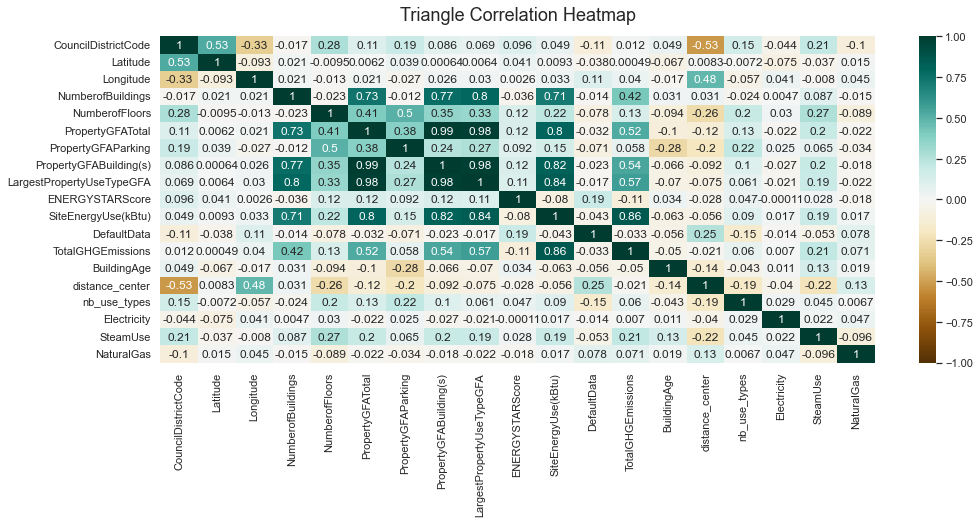

In [70]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data2.corr(), dtype=np.bool))
heatmap = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Nous constatons qu'un sous-ensemble des variables sont très fortement corrélées entre elles (multicolinéarité).

Nous pouvons aussi constater que la variable 'ENERGYSTARScore' présente un coefficient de corrélation linéaire très faible avec les variables à expliquer ('TotalGHGEmissions', 'SiteEnergyUse(kBtu)'). Cela laisse entendre que cette variable ne sera pas très importante pour notre modèle, mais nous le confirmerons avec une analyse de l'importance des variables (features importance) a posteriori.

### Suppression des données fortement corrélées

Nous allons supprimer les variables fortement corrélées entre elles (sauf une), telles qu'apparaissant d'après la matrice des interactions. Éliminer les variables colinéaires permet d'augmenter la vitesse d'apprentissage, l'interprétabilité, la stabilité et de réduire le fléau de la dimension. Cela peut néanmoins diminuer un peu la précision du modèle.


In [71]:
# 'BuildingType' and 'PrimaryPropertyType' are strongly correlated
# We keep 'PrimaryPropertyType' (more correlated to the targets)
data2 = data2.drop(columns=['BuildingType'])

# 'CouncilDistrictCode','Neighborhood', 'Latitude' and 'Longitude' are strongly correlated
# We keep 'Neighborhood' (more correlated to the targets)
data2 = data2.drop(columns=['CouncilDistrictCode', 'Latitude', 'Longitude'])

# 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA' are strongly correlated
# We keep 'LargestPropertyUseTypeGFA' (more correlated to the targets)
data2 = data2.drop(columns=['LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)'])

# 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'PrimaryPropertyType' are strongly correlated
# We keep 'PrimaryPropertyType' (more correlated to the targets)
data2 = data2.drop(columns=['ListOfAllPropertyUseTypes', 'LargestPropertyUseType'])

C:\Users\dtulomba\AppData\Local\Temp/ipykernel_20612/3405191826.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data2.corr(), dtype=np.bool))


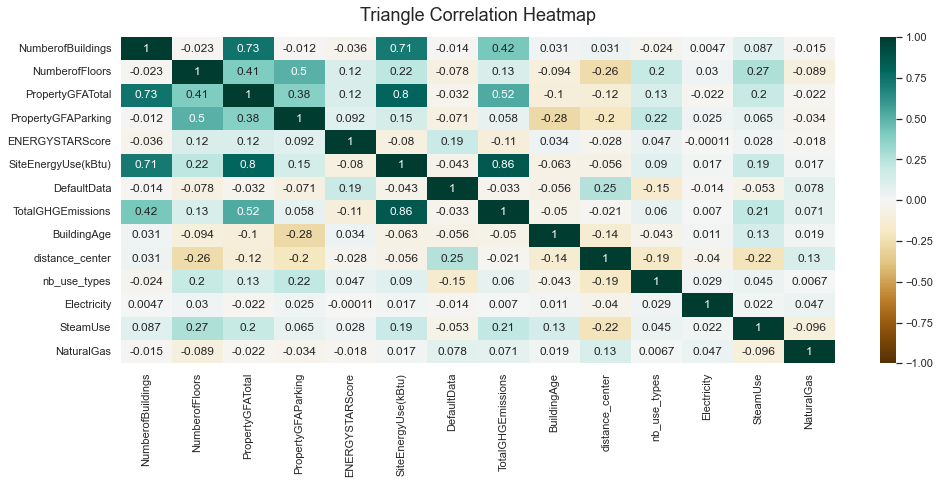

In [72]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data2.corr(), dtype=np.bool))
heatmap = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [73]:
data2.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'DefaultData',
       'ComplianceStatus', 'TotalGHGEmissions', 'BuildingAge',
       'distance_center', 'nb_use_types', 'Electricity', 'SteamUse',
       'NaturalGas', 'Buildings Consumption', 'Neighborhood Consumption'],
      dtype='object')

<AxesSubplot:>

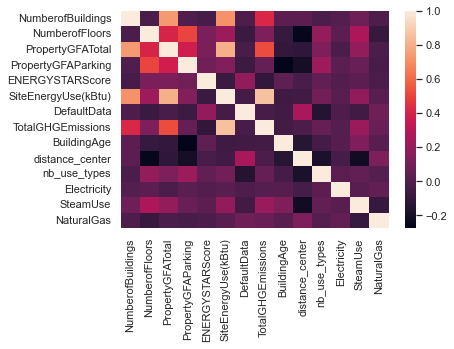

In [74]:
sns.heatmap(data2.corr())

In [75]:
data2.dtypes

PrimaryPropertyType          object
Neighborhood                 object
NumberofBuildings           float64
NumberofFloors                int64
PropertyGFATotal              int64
PropertyGFAParking            int64
ENERGYSTARScore             float64
SiteEnergyUse(kBtu)         float64
DefaultData                    bool
ComplianceStatus             object
TotalGHGEmissions           float64
BuildingAge                   int64
distance_center             float64
nb_use_types                  int64
Electricity                    bool
SteamUse                       bool
NaturalGas                     bool
Buildings Consumption        object
Neighborhood Consumption     object
dtype: object

In [76]:
data2.head()

,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEnergyUse(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,BuildingAge,distance_center,nb_use_types,Electricity,SteamUse,NaturalGas,Buildings Consumption,Neighborhood Consumption
0,Hotel,DOWNTOWN,1.0,12,88434,0,60.0,7226362.5,False,Compliant,249.98,96,1.419403,1,True,True,True,medium electricity consuming buildings,Neighborhood with high electricity consumption
1,Hotel,DOWNTOWN,1.0,11,103566,15064,61.0,8387933.0,False,Compliant,295.86,27,1.829354,3,True,False,True,medium electricity consuming buildings,Neighborhood with high electricity consumption
2,Hotel,DOWNTOWN,1.0,41,956110,196718,43.0,72587024.0,False,Compliant,2089.28,54,1.372196,1,True,True,True,medium electricity consuming buildings,Neighborhood with high electricity consumption
3,Hotel,DOWNTOWN,1.0,10,61320,0,56.0,6794584.0,False,Compliant,286.43,97,1.523923,1,True,True,True,medium electricity consuming buildings,Neighborhood with high electricity consumption
4,Hotel,DOWNTOWN,1.0,18,175580,62000,75.0,14172606.0,False,Compliant,505.01,43,1.129403,3,True,False,True,medium electricity consuming buildings,Neighborhood with high electricity consumption


### Suppression des valeurs hors-normes

In [77]:
def IQR_outliers_mask(dataframe, feature='TARGET'):
    """This function return a mask of outliers.
    Outliers are those with value less than (Q1 + 1.5*IQR) or bigger than (Q3 + 1.5*IQR)"""
    
    Q1 = dataframe[feature].quantile(q=0.25, interpolation='linear')   # first quartile
    Q3 = dataframe[feature].quantile(q=0.75, interpolation='linear')   # third quartile
    IQR = Q3 - Q1                                                      # inter-quartile range
    
    # definition of mask of outliers
    mask = (dataframe[feature] < Q1 - 1.5*IQR) | (dataframe[feature] > Q3 + 1.5*IQR)
    
    # application of mask
    outliers = dataframe[mask]
    
    # Displays number of outliers
    print("Number of detected outliers:", len(mask[mask]))
    
    # return the mask of outliers
    return mask

In [78]:
mask1 = IQR_outliers_mask(data2, feature='TotalGHGEmissions')
mask2 = IQR_outliers_mask(data2, feature='SiteEnergyUse(kBtu)')
mask = mask1 | mask2

# Deleting outliers
data2 = data2[~mask]

print("Données restantes :", len(data2))

Number of detected outliers: 178
Number of detected outliers: 188
Données restantes : 1425


In [79]:
data2.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'DefaultData',
       'ComplianceStatus', 'TotalGHGEmissions', 'BuildingAge',
       'distance_center', 'nb_use_types', 'Electricity', 'SteamUse',
       'NaturalGas', 'Buildings Consumption', 'Neighborhood Consumption'],
      dtype='object')

In [80]:
list_drop = ['DefaultData','Neighborhood', 'PrimaryPropertyType', 'ComplianceStatus']

data2 = data2.drop(columns=list_drop, axis=1)

### Export du fichier

In [81]:
data2.columns

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'BuildingAge', 'distance_center', 'nb_use_types',
       'Electricity', 'SteamUse', 'NaturalGas', 'Buildings Consumption',
       'Neighborhood Consumption'],
      dtype='object')

In [82]:
data2.to_csv('2016_Building_Energy_Benchmarking_cleaned.csv', index=False)